# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [49]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
import json
import sys
rep_path = ''
import os
import csv
import pandas as pd
from rdkit import Chem
import seaborn as sns
import matplotlib.pyplot as plt






In [11]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has



# Specify the path to the JSON file
json_file_path = r'/mnt/c/Users/LENOVO/Desktop/output.json'


# Open the JSON file
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Specify the path to your desktop directory
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Specify the path for the output CSV file on your desktop
csv_file_path = os.path.join(desktop_path, 'output.csv')

# Open a CSV file in write mode
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write header row based on keys of the first item in the JSON data
    writer.writerow(data[0].keys())

    # Write data rows
    for item in data:
        writer.writerow(item.values())

print(f"CSV file saved to: {csv_file_path}")




CSV file saved to: /home/akriti_2025/Desktop/output.csv


In [13]:
import pandas as pd


df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Print the shape of the dataframe 
print("\nShape of the dataframe:", df.shape)

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Display information about the dataframe including data types and non-null values
print("\nInformation about the dataframe:")
print(df.info())


print("\nRandom sample of 5 rows:")
print(df.sample(5))

First few rows of the dataframe:
                                               input  \
0  {'key': 'SUTWUYBMBWPLMW-MDWZMJQESA-N', 'input'...   
1  {'key': 'RIYHJWOTNJXDLV-UHFFFAOYSA-N', 'input'...   
2  {'key': 'OGNBARHGQVMGGX-UHFFFAOYSA-N', 'input'...   
3  {'key': 'WQEXDIRUOYNDCM-UHFFFAOYSA-N', 'input'...   
4  {'key': 'YEGVLLQDOGYWDQ-OAHLLOKOSA-N', 'input'...   

                            output  
0  {'outcome': 0.3471122086048126}  
1  {'outcome': 0.5470296740531921}  
2  {'outcome': 0.1782178282737732}  
3  {'outcome': 0.6204620599746704}  
4  {'outcome': 0.6232673525810242}  

Shape of the dataframe: (1000, 2)

Summary statistics of numerical columns:
                                                    input  \
count                                                1000   
unique                                               1000   
top     {'key': 'ZCMMWOVFLLUFDU-UHFFFAOYSA-N', 'input'...   
freq                                                    1   

                         

In [ ]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here
# from src import standardise_smiles


In [ ]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

In [2]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [41]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has

import pandas as pd
import os
import csv

# Specify the path to the CSV file
file_path = r'/mnt/c/Users/LENOVO/Desktop/outputeos30gr.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Specify the path for the output CSV file on your desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
csv_file_path = os.path.join(desktop_path, 'outputeos30gr.csv')

# Open a CSV file in write mode
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write header row with column names
    writer.writerow(data.columns)

    # Write data rows
    for index, row in data.iterrows():
        writer.writerow(row)

print(f"CSV file saved to: {csv_file_path}")









CSV file saved to: /home/akriti_2025/Desktop/outputeos30gr.csv


In [ ]:
## Here I extracted a csv from the output in json form which I obtained after running the model

In [43]:
## Here i have performed some Exploratory data analysis
import pandas as pd


df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Print the shape of the dataframe 
print("\nShape of the dataframe:", df.shape)

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Display information about the dataframe including data types and non-null values
print("\nInformation about the dataframe:")
print(df.info())


print("\nRandom sample of 5 rows:")
print(df.sample(5))

First few rows of the dataframe:
                                                text   outcome
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1  0.347112
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1  0.547030
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl  0.178218
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...  0.620462
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...  0.623267

Shape of the dataframe: (1000, 2)

Summary statistics of numerical columns:
          outcome
count  997.000000
mean     0.439939
std      0.189433
min      0.034653
25%      0.298267
50%      0.425743
75%      0.566832
max      0.967822

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   text     1000 non-null   object 
 1   outcome  997 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB
None



/home/akriti_2025/miniconda3/envs/ersilia/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  app.launch_new_instance()


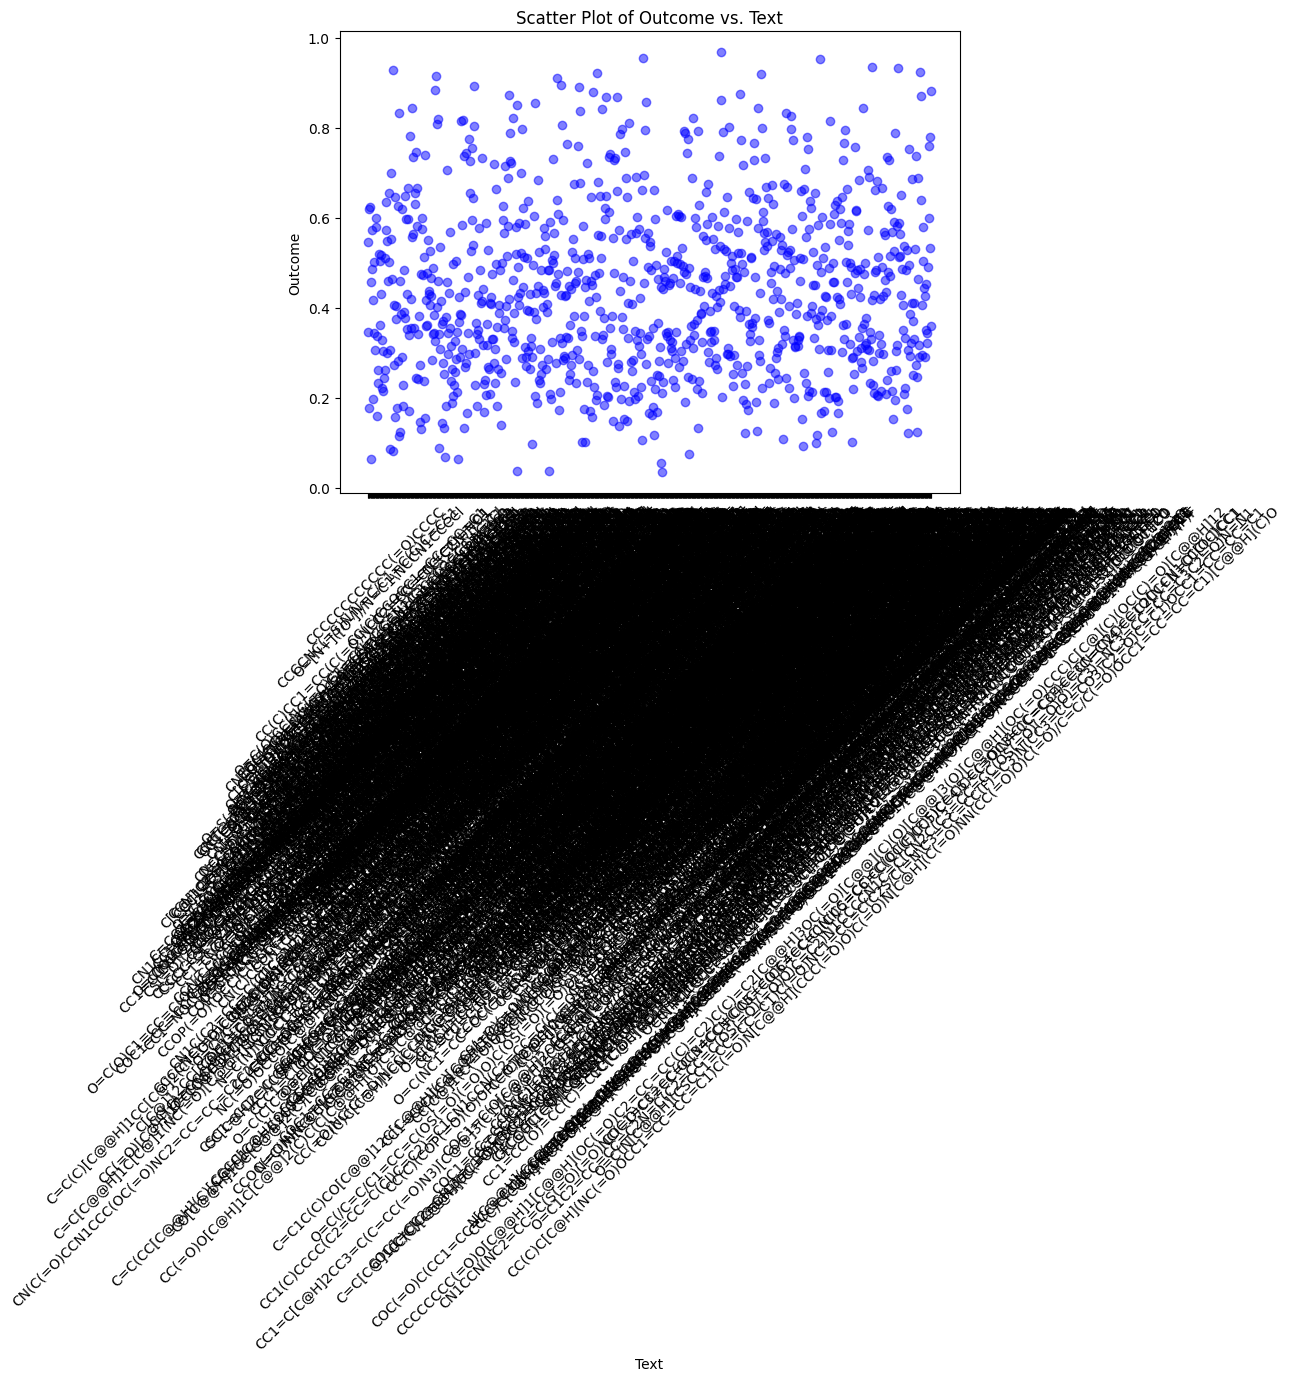

In [44]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values


import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['text'], df['outcome'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Outcome vs. Text')
plt.xlabel('Text')
plt.ylabel('Outcome')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


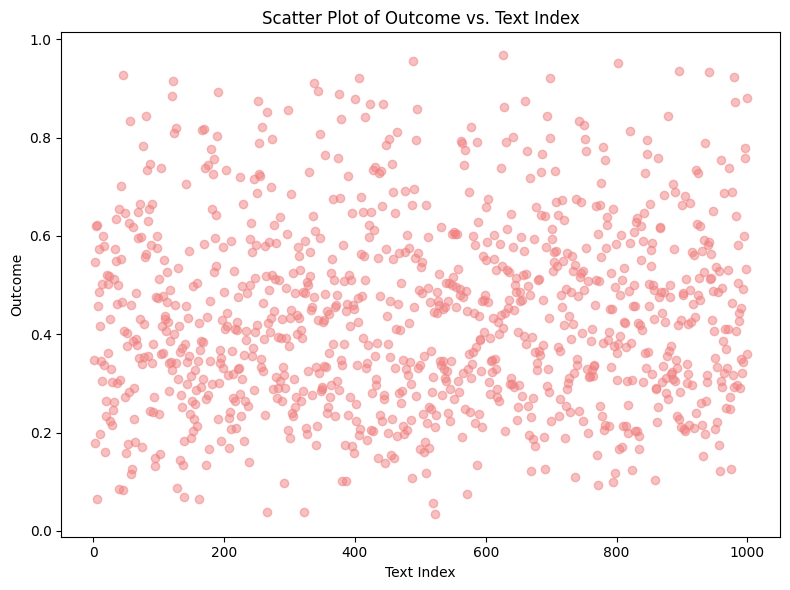

In [47]:
#Indexing the text (smiles string) then plotting a scatter plot
df = pd.read_csv(csv_file_path)

# Assign index numbers to the text column
df['text_index'] = range(1, len(df) + 1)
plt.figure(figsize=(8, 6))
plt.scatter(df['text_index'], df['outcome'], color='lightcoral', alpha=0.5)
plt.title('Scatter Plot of Outcome vs. Text Index')
plt.xlabel('Text Index')
plt.ylabel('Outcome')
plt.tight_layout()
plt.show()


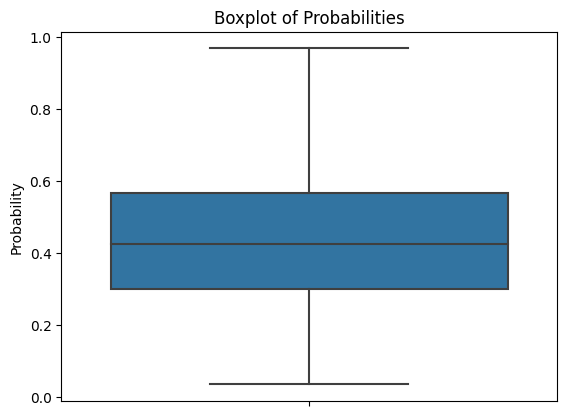

In [50]:
#Making a box plot to check for ouliers in the output that might lead to comment on model bias
# Read CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Create a boxplot to visualize the spread of probabilities
sns.boxplot(data=df, y="outcome")
plt.title("Boxplot of Probabilities")
plt.ylabel("Probability")
plt.show()

In [ ]:
## We found no ouliers

In [ ]:
## Visualising the outputs of eos30gr via histograms


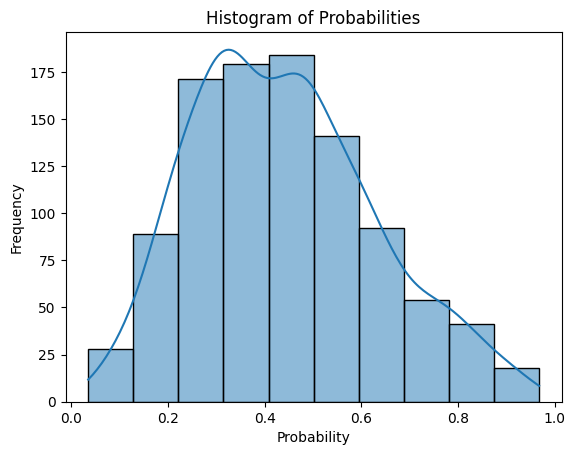

/home/akriti_2025/miniconda3/envs/ersilia/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  # This is added back by InteractiveShellApp.init_path()


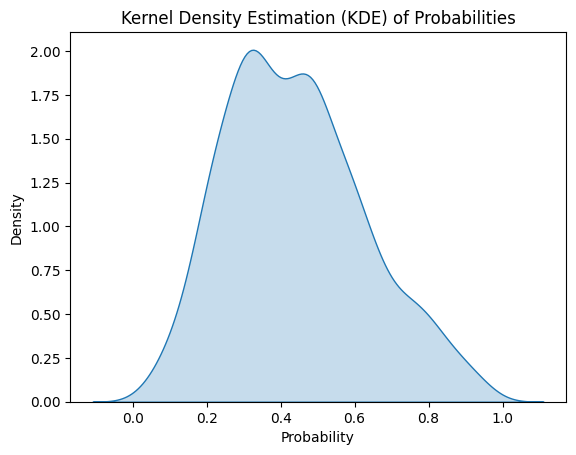

In [52]:
df = pd.read_csv(csv_file_path)

# Create a histogram to visualize the distribution of probabilities
sns.histplot(data=df, x="outcome", bins=10, kde=True)
plt.title("Histogram of Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

# Create a KDE plot to visualize the distribution of probabilities
sns.kdeplot(data=df, x="outcome", shade=True)
plt.title("Kernel Density Estimation (KDE) of Probabilities")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()

In [54]:
## The supporting publication mentions a molecule is considered hERG blocaked with outcome above 80 percent,
## Finding and plotting how many in the dataset of 1000 molecules are blocakdes


df = pd.read_csv(csv_file_path)  

# Filter out molecules with an outcome over 80 percent
blockades_df = df[df['outcome'] > 0.8]

# Display the input part of molecules considered as blockades
blockades_input = blockades_df['text']
print("Molecules that are blockades:")
for input_value in blockades_input:
    print(input_value)
# Print the number of molecules considered as blockades out of 1000
num_blockades = len(blockades_df)
print(f"Number of molecules considered as blockades out of 1000: {num_blockades}")


Molecules that are blockades:
Cl.Cl.N#CC1=CC=C(CN2C(CN3CCCC3)=NC3=CC=CC=C23)C=C1
COC1=CC=CC=C1C1=CC(C)=C(NC2=CC=NC(NC3=CC=C(C#N)C=C3)=N2)C(C)=C1
C1=CC=C(P(=C2C3=CC=CC=C3C3=CC=CC=C23)(C2=CC=CC=C2)C2=CC=CC=C2)C=C1
O=[N+]([O-])C1=NN(CCCN(CC2=CC=C(C(F)(F)F)C=C2)CC2=CC=C(C(F)(F)F)C=C2)C=N1
ClC1=CC=C(N=C2C=CN(CCCCCN3C=CC(=NC4=CC=C(Cl)C=C4)C=C3)C=C2)C=C1
CCCCCCN1C=NC2=C3C=CC=CC3=C3C(=C12)CCC(C)(C)O3
CN(CCCC1=CNC2=CC=C(F)C=C12)C1COC2=CC=C3C(=C2C1)C(=O)NCC3
O=S(=O)(NCC1=CC=C(Cl)C=C1)C1=CC(Cl)=C(OC2=CC=CC(N3CCNCC3)=C2)S1
OC1=CC=C(CC2CCN(CCC#CC3=CC=CC=C3)CC2)C=C1
CS(=O)(=O)C1=CC=C(C2=C3C(=C(C4=CC=C(S(C)(=O)=O)C=C4)N2)C2CCC3C2)C=C1
CC(C)(C)C1=CC=C(CN(CC2=CC=CC3=CC=CC=C23)N2C=NN=C2)C=C1
CCCN(CCC)[C@H]1COC2=C(C=CC=C2C2=CC=C(OC)C=C2)C1
N#CC1=CC=CC(NC(=O)NCCCN2CCC(CC3=CC=C(C(F)(F)F)C=C3)CC2)=C1
O=C1OC2=CC=CC=C2C(NC2=CC=C(OCCN3CCCC3)C=C2)=C1C1=CC=C(F)C=C1
O=C1C=C(OCC2=CC=C(F)C=C2)C=CN1C1=CC=CC(OCCN2CCCC2)=C1
C1=CC=C2C(NCCCCCCNC3=C4C(=NC5=CC=CC=C35)CCC4)=C3C(=NC2=C1)CCC3
CCC1=CC=C(OCCCCN2C=CN=C2)C=C1
CC

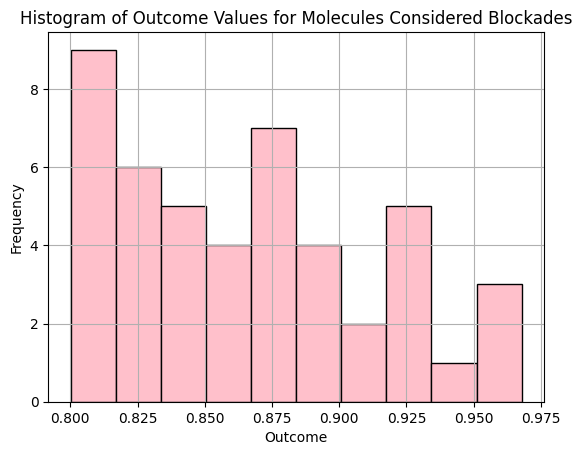

In [55]:


df = pd.read_csv(csv_file_path)  

# Filter out molecules with an outcome over 80 percent
blockades_df = df[df['outcome'] > 0.8]

# Plot histogram of outcome values for molecules considered blockades
plt.hist(blockades_df['outcome'], bins=10, color='pink', edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Outcome Values for Molecules Considered Blockades')
plt.grid(True)
plt.show()

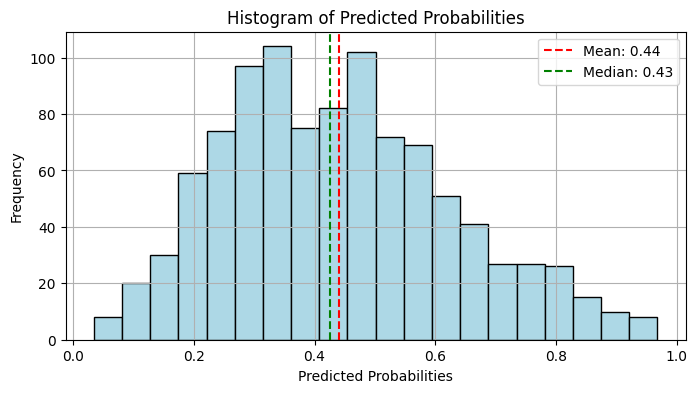

/home/akriti_2025/miniconda3/envs/ersilia/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



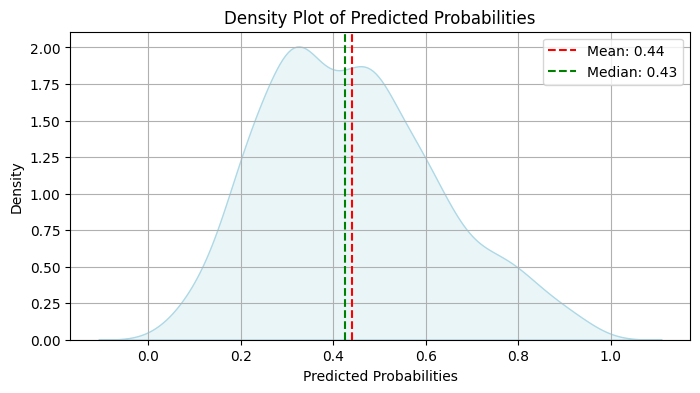

In [61]:

df = pd.read_csv(csv_file_path)

predicted_outcomes = df['outcome']

# Calculate mean and median
mean_outcome = predicted_outcomes.mean()
median_outcome = predicted_outcomes.median()

# Plot a histogram of predicted outcomes
plt.figure(figsize=(8, 4))
plt.hist(predicted_outcomes, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.axvline(x=mean_outcome, color='red', linestyle='--', label=f'Mean: {mean_outcome:.2f}')
plt.axvline(x=median_outcome, color='green', linestyle='--', label=f'Median: {median_outcome:.2f}')
plt.legend()
plt.grid(True)
plt.show()

# Plot a density plot of predicted outcomes
plt.figure(figsize=(8, 4))
plt.title('Density Plot of Predicted Probabilities')
sns.kdeplot(predicted_outcomes, color='lightblue', shade=True)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.axvline(x=mean_outcome, color='red', linestyle='--', label=f'Mean: {mean_outcome:.2f}')
plt.axvline(x=median_outcome, color='green', linestyle='--', label=f'Median: {median_outcome:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
## Statistics summary

df = pd.read_csv(csv_file_path)  
# Calculate summary statistics
summary_stats = df['outcome'].describe()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
count    997.000000
mean       0.439939
std        0.189433
min        0.034653
25%        0.298267
50%        0.425743
75%        0.566832
max        0.967822
Name: outcome, dtype: float64
